In [1]:
#Take 10  data points (x, y), where y = f(x)+err. Take f(x) as quadratic.
#Fit linear model and plot the line. Find bias and variance.
#Fit 3  higher order polynomials  ( 3, 7, 11) . Plot  each model and find B & V
# At this point you have 4 different models for the 10 points, and their B/V.
#Now apply ridge regression, plot the curve and show B&V on the plot.
    #Take lambda .0001, .01, 1, 10 and 100.
#Do the same exercise with Lasso.

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 

,x,y
0,-0.977278,-3.877646
1,-0.151357,-1.953980
2,-0.103219,-2.527311
3,0.400157,-1.357602
4,0.410599,-0.987159


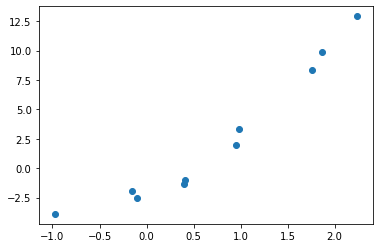

In [39]:
x=np.empty(shape=(10,1))
y=np.empty(shape=(10,1))
f=np.empty(shape=(10,1))
np.random.seed(0)
x= np.random.normal(0,1,10)
x=np.sort(x)
y=2*(x**2) + 3*x + np.random.normal(-3, 1, 10)
plt.scatter(x,y)   
dataset=pd.DataFrame(x, columns=['x'])
dataset['y']=y
dataset.head()

0    1.318464
dtype: float64
[28.50104543]
0    0.39653
dtype: float64
[30.83282383]
0    0.176984
dtype: float64
[30.97294036]
0    2.992016e-11
dtype: float64
[31.05501514]


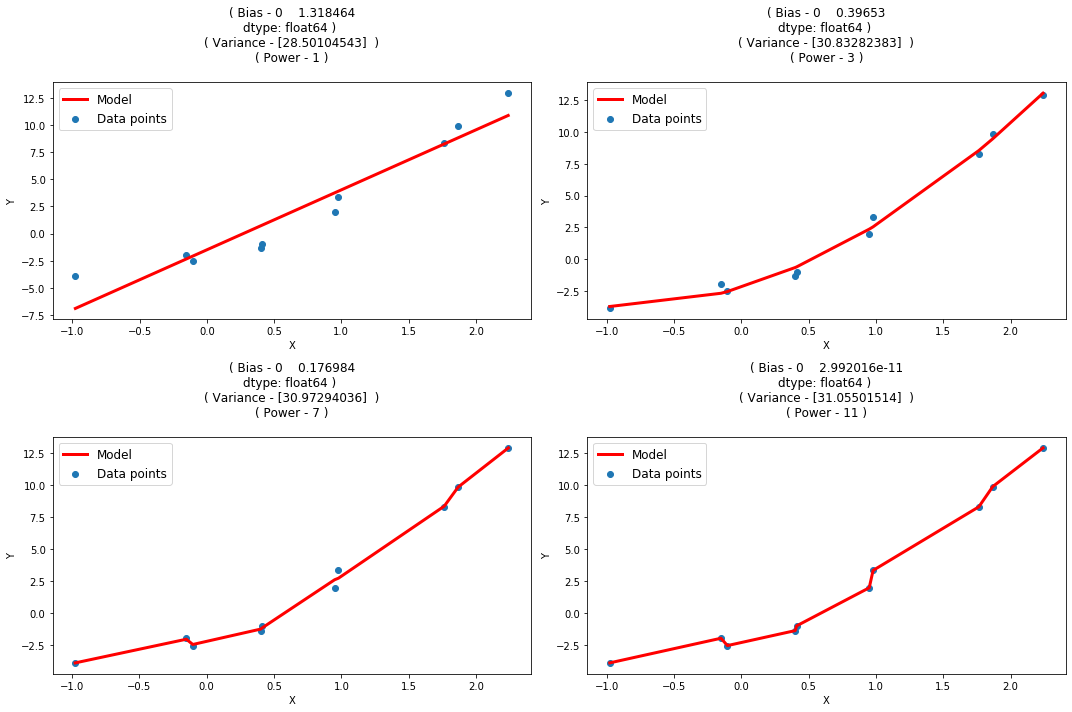

In [40]:
x1=dataset['x'].values.reshape(-1,1)
y1=dataset['y'].values.reshape(-1,1)
plt.figure(figsize=(15,10))
polynomial = [1,3,7,11]
i=1
for pow in polynomial : 
    poly = PolynomialFeatures(degree = pow) 
    x_poly = poly.fit_transform(x1) 
    poly_reg = LinearRegression() 
    poly_reg.fit(x_poly, y1) 
    ypred = poly_reg.predict(x_poly)

    plt.subplot(2,2,i)
    plt.scatter(x1,y1)
    plt.plot(x1, ypred ,color='red', linewidth=3)

    #calculating bias , variance and error
    bias = []
    actual = []
    predicted = ypred
    actual = y1
    bias = [ abs(a - p)  for a, p in zip(actual, predicted)]
    bias = pd.DataFrame(bias)
    B = bias.sum() / len(bias)
    V=0
    meanpred=np.mean(ypred)
    for j in range(10):
        V=V + (ypred[j]-meanpred)**2
    V=V/10

    plt.title("( Bias - "+str(B)+ " ) \n( Variance - " +str(V)+ "  )\n( Power - " +str(pow)+ " )\n")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(['Model','Data points'],fontsize=12)
    plt.tight_layout()
    i+=1
    
plt.savefig("Linear.png",bbox_inches='tight')

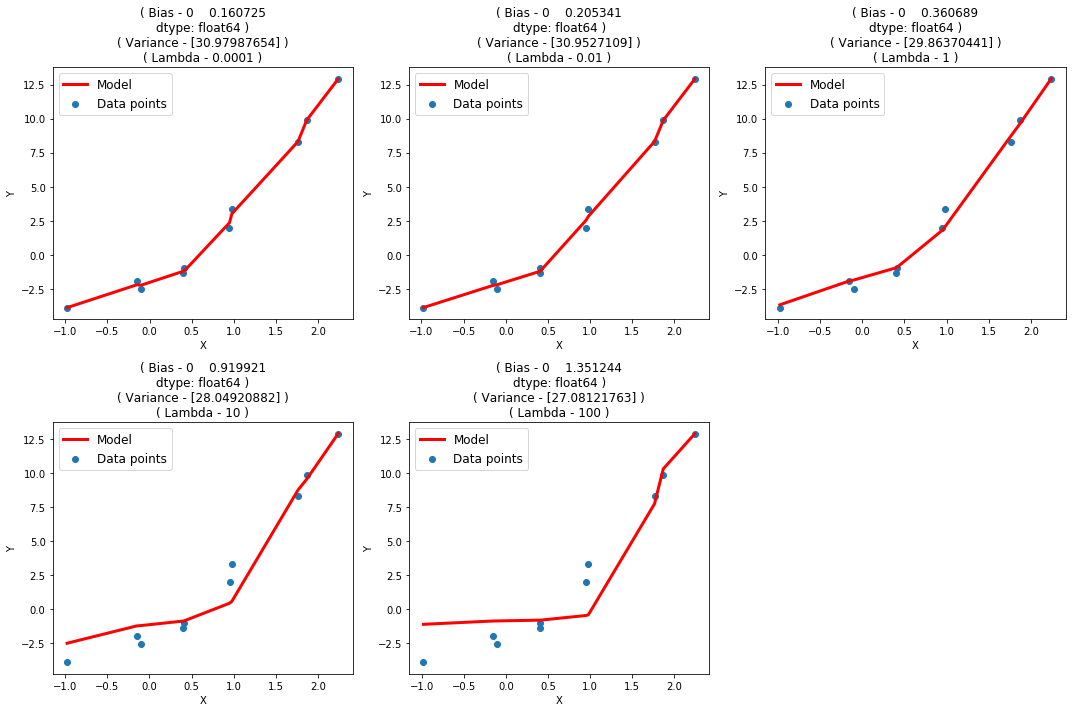

In [41]:
#Ridge Regression
plt.figure(figsize=(15,10))
i=1
lambdaa  = [0.0001,0.01,1,10,100]
for lmbda in lambdaa:    
    poly = PolynomialFeatures(degree = 11) 
    x_poly = poly.fit_transform(x1) 
    
    r = Ridge(alpha=lmbda).fit(x_poly , y1)
    plt.subplot(2,3,i)
    plt.scatter(x1,y1)
    r_pred = r.predict(x_poly)
    plt.plot(x1, r_pred ,color='red', linewidth=3)
     
    # calculating bias, variance and error
    bias = []
    actual = []
    predicted = r_pred
    actual = y1
    bias = [abs(a - p)  for a, p in zip(actual, predicted)]
    bias = pd.DataFrame(bias)
    B = bias.sum() / len(bias)
    V=0
    meanpred=np.mean(ypred)
    for j in range(10):
        V=V + (r_pred[j]-meanpred)**2
    V=V/10
    
    plt.title("( Bias - "+str(B)+" )\n( Variance - "+str(V)+" )\n( Lambda - "+str(lmbda)+" )")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(['Model','Data points'],fontsize=12)
   
    plt.tight_layout()
    i+=1
    
plt.savefig("Ridge.png",bbox_inches='tight')

C:\Users\ashwa\Anaconda3new\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8187252702371843, tolerance: 0.0310550151378247
  positive)
C:\Users\ashwa\Anaconda3new\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0956602502191672, tolerance: 0.0310550151378247
  positive)
C:\Users\ashwa\Anaconda3new\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7598707707850885, tolerance: 0.0310550151378247
  positive)
C:\Users\ashwa\Anaconda3new\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

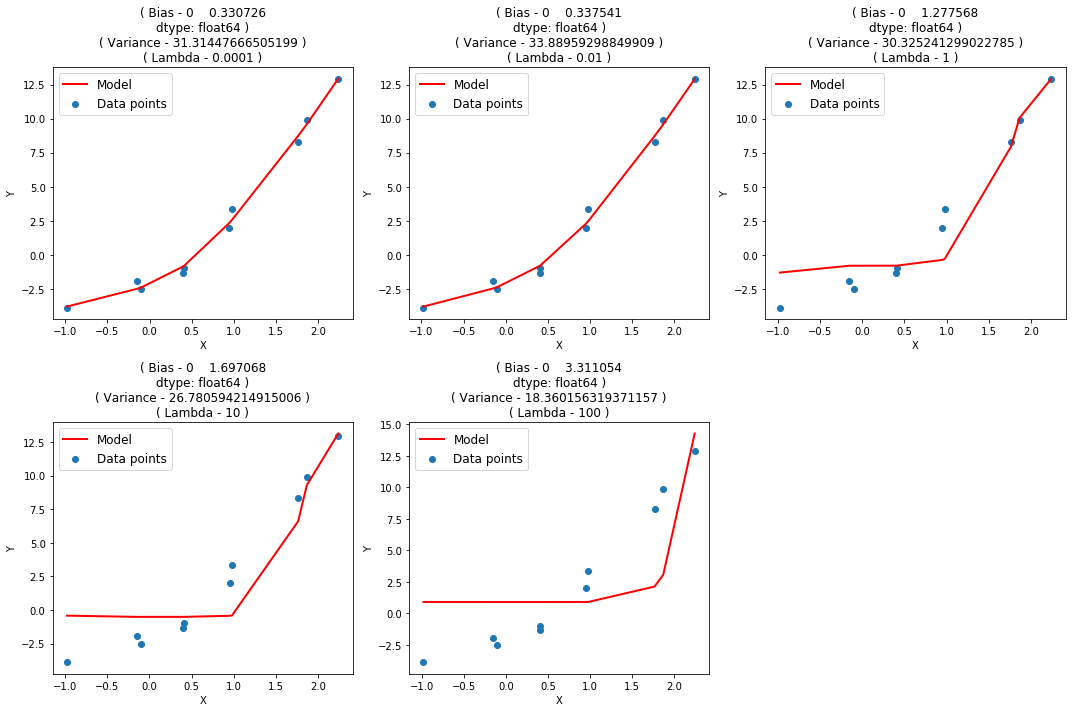

In [45]:
#Lasso Regression
plt.figure(figsize=(15,10))
i=1
lambdaa  = [0.0001,0.01,1,10,100]
for lmbda in lambdaa:    
    poly = PolynomialFeatures(degree = 11) 
    x_poly = poly.fit_transform(x1) 
    
    l = Lasso(alpha=lmbda).fit(x_poly,y1)
    plt.subplot(2,3,i)
    plt.scatter(x1,y1)
    l_pred = l.predict(x_poly)
    plt.plot(x, l_pred ,color='red', linewidth=2)

    x_train, x_test, y_train, y_test = train_test_split(x1, y1)

    # calculating bias, variance and error
    bias = []
    actual = []
    predicted = l_pred
    actual = y1
    bias = [abs(a - p)  for a, p in zip(actual, predicted)]
    bias = pd.DataFrame(bias)
    B = bias.sum() / len(bias)

    meanpred=np.mean(ypred)
    for j in range(10):
        V=V + (l_pred[j]-meanpred)**2
    V=V/10
    
    plt.title("( Bias - "+str(B)+" )\n( Variance - "+str(V)+" )\n( Lambda - "+str(lmbda)+" )")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(['Model','Data points'],fontsize=12)
   
    plt.tight_layout()
    i+=1
    
plt.savefig("Lasso.png",bbox_inches='tight')